In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

In [2]:
db = pd.read_csv('ab_data.csv')
db.head()

user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1

**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
db.shape[0]

294478

**c.** The number of unique users in the dataset.

In [4]:
users = db.user_id.nunique()
print(users)

290584


**d.** The proportion of users converted.

In [5]:
(len(db[db['converted']==1]))/db.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
db[(db['group']=='treatment') == (db['landing_page']!='new_page')].shape[0]

3893

**f.** Do any of the rows have missing values?

In [7]:
db.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = pd.read_csv('ab_data.csv')
df2.head()
df2 = df2.drop(df2[((df2['group']=='treatment') == (df2['landing_page']!='new_page'))].index)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group']=='treatment') == (df2['landing_page']!='new_page'))].shape[0]

0

**a.** How many unique **user_id**s are in **df2**?

In [10]:
users = df2.user_id.nunique()
print(users)

290584


**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
res =df2['user_id'].duplicated()
sum(res)

1

**c.** Display the rows for the duplicate **user_id**? 

In [12]:
df2[df2.duplicated(['user_id'], keep = False)]

user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0

**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(df2.query("timestamp == '2017-01-14 02:55:59.590927'").index)
# Check again if the row with a duplicate user_id is deleted or not
users = df2.user_id.nunique()
print(users)

290584


In [14]:
sum(df2['converted'])/df2.shape[0]

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
len(df2.query("group == 'control' & converted == '1'"))/len(df2.query("group == 'control'"))

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
len(df2.query("group == 'treatment' & converted == '1'"))/len(df2.query("group == 'treatment'"))

0.11880806551510564

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
len(df2.query("group == 'control' & converted == '1'"))/len(df2.query("group == 'control'"))-len(df2.query("group == 'treatment' & converted == '1'"))/len(df2.query("group == 'treatment'"))

0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [18]:
len(df2.query("landing_page == 'new_page' & converted == '1'"))/len(df2.query("converted == '1'"))

0.4967628693925704

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**Your answer goes here.**
Given that an individual was in the treatment group, the probability they converted is 0.11880806551510564
Given that an individual was in the control group, the probability they converted is 0.1203863045004612


>**Put your answer here.**

**$H_0$** : **$p_{new}$** <= **$p_{old}$**

**$H_1$** : **$p_{new}$** > **$p_{old}$**

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

In [21]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

In [23]:
# Simulate a Sample for the treatment Group
new_page_converted=np.random.binomial(1,p_new,n_new)
len(new_page_converted)


145310

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted=np.random.binomial(1,p_old,n_old)
len(old_page_converted)

145274

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
new_page_converted.mean()-old_page_converted.mean()

0.0023242991165206284


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [26]:
# Sampling distribution 
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, (1- p_new)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, (1- p_old)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

p_diffs=np.asarray(p_diffs)
p_diffs



array([ 0.00140225,  0.00028733, -0.00047022, ..., -0.00033935,
        0.00056925, -0.00251427])

In [27]:
p_diffs = np.array(p_diffs)

(array([    8.,    81.,   479.,  1655.,  2970.,  2894.,  1464.,   381.,
           65.,     3.]),
 array([ -4.83374440e-03,  -3.85363787e-03,  -2.87353134e-03,
         -1.89342482e-03,  -9.13318289e-04,   6.67882378e-05,
          1.04689476e-03,   2.02700129e-03,   3.00710782e-03,
          3.98721435e-03,   4.96732087e-03]),
 <a list of 10 Patch objects>)

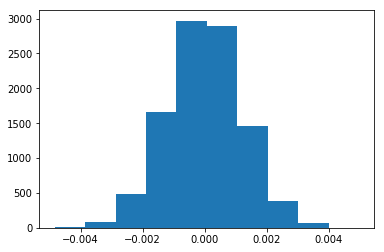

In [28]:
plt.hist(p_diffs)

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

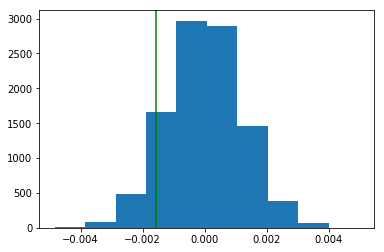

In [29]:
obs_diff=df2.query('group =="treatment"').converted.mean()-df2.query('group =="control"').converted.mean()
obs_diff
plt.hist(p_diffs)
plt.axvline(obs_diff,color="green")

In [30]:
(p_diffs>obs_diff).mean()

0.90169999999999995

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

>**Put your answer here.**
We believe new page is better but in reality old page is better.that is consider a type l error 
the value signify to p_value. 
we fail to reject the null hypothesis new page is not better then old page 
suggesting old page may be slightly better.

In [31]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2.query('landing_page=="old_page" & converted ==1'))

# number of conversions with the new_page
convert_new = len(df2.query('landing_page=="new_page" & converted ==1'))

# number of individuals who were shown the old_page
n_old = len(df2.query('landing_page=="old_page"'))

# number of individuals who received new_page
n_new = len(df2.query('landing_page=="new_page"'))
convert_old,convert_new,n_old,n_new

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145310)

In [32]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller',prop_var=False)
print(z_score, p_value)

1.31092419842 0.905058312759


>**Put your answer here.**
The p-value agrees with findings in j. we fail to reject the null hypothesis.
the z-score here is small and p-value is large, it suggests the old page are actually better than the new page.

>**Logistic Regression should be used, because logistic used to predict categorical data with only 2 outcomes
and we want to predict 1 of 2 possible outcomes(conversion/no conversion)**


**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [44]:
df2['intercept']=1
df2['ab_page']=df2['landing_page'].apply(lambda x: 1 if x=='new_page' else 0)
df2 =df2.join(pd.get_dummies(df2['landing_page']))
df2.head()

user_id                   timestamp      group landing_page  converted  \
0   851104  2017-01-21 22:11:48.556739    control     old_page          0   
1   804228  2017-01-12 08:01:45.159739    control     old_page          0   
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0   
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0   
4   864975  2017-01-21 01:52:26.210827    control     old_page          1   

   intercept  ab_page  control  treatment  new_page  old_page  
0          1        0        1          0         0         1  
1          1        0        1          0         0         1  
2          1        1        0          1         1         0  
3          1        1        0          1         1         0  
4          1        0        1          0         0         1

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [45]:
import statsmodels.api as sm
logl = sm.Logit(df2['converted'],df2[['intercept','ab_page']])

res = logl.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [46]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-23 00:47 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

In [47]:
1/np.exp(-0.0150), 1/np.exp(-1.9888)

(1.0151130646157189, 7.3067603868728614)

>**Put your answer here
the p-value is different for each case,
-in first case we calculate the probability if the null hypothesis is true.
-in second there is no significant relationship between the conversion rate and ab_page
becouse the ab_page > 0.05.
-p-value (< 0.05) suggests a variable is statistically significant in relating to the response variable**


**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Put your answer here.
it is a good idea to consider other factors to add into regression model to increase the accuracy
and adding additional terms into regression model but there are dependant the prediction may be fall
**

In [36]:
# Read the countries.csv
df_country=pd.read_csv('countries.csv')
df_country.head()

user_id country
0   834778      UK
1   928468      US
2   822059      UK
3   711597      UK
4   710616      UK

In [37]:
# Join with the df2 dataframe
df_merged = df_country.set_index('user_id').join(df2.set_index('user_id'))
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  control  treatment  
user_id                                                     
834778           0          1        0        1          0  
928468           0          1        1        0          1  
822059           1          1        1        0          1  
711597           0          1        0        1          0  
710616           0          1        1        0          1

In [38]:
# Create the necessary dummy variables
df_merged=df_merged.join(pd.get_dummies(df_merged['country']))
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  control  treatment  CA  UK  US  
user_id                                                                 
834778           0          1        0        1          0   0   1   0  
928468           0          1        1        0          1   0   0   1  
822059           1          1        1        0          1   0   1   0  
711597           0          1        0        1          0   0   1   0  
710616           0          1        1        0          1   0   1   0

In [48]:
# Fit your model, and summarize the results

log2 = sm.Logit(df_merged['converted'], df_merged[['intercept', 'UK', 'US']])
res2 = log2.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [40]:
res2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-23 00:42 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [49]:
np.exp(0.0408),np.exp(0.0507),1/(np.exp(-2.0375))

(1.0416437559600236, 1.0520072437650141, 7.6714066890204302)

In [51]:
df_merged['US_ab_page'] = df_merged['US'] * df_merged['ab_page']
df_merged['CA_ab_page'] = df_merged['CA'] * df_merged['ab_page']
df_merged['UK_ab_page'] = df_merged['UK'] * df_merged['ab_page']

In [52]:
df_merged.head()

country                   timestamp      group landing_page  \
user_id                                                               
834778       UK  2017-01-14 23:08:43.304998    control     old_page   
928468       US  2017-01-23 14:44:16.387854  treatment     new_page   
822059       UK  2017-01-16 14:04:14.719771  treatment     new_page   
711597       UK  2017-01-22 03:14:24.763511    control     old_page   
710616       UK  2017-01-16 13:14:44.000513  treatment     new_page   

         converted  intercept  ab_page  control  treatment  CA  UK  US  \
user_id                                                                  
834778           0          1        0        1          0   0   1   0   
928468           0          1        1        0          1   0   0   1   
822059           1          1        1        0          1   0   1   0   
711597           0          1        0        1          0   0   1   0   
710616           0          1        1        0          1   0   1   0   

         US_ab_page  CA_ab_page  UK_ab_page  
user_id                                      
834778            0           0           0  
928468            1           0           0  
822059            0           0           1  
711597            0           0           0  
710616            0           0           1

In [55]:
lms3=sm.Logit(df_merged['converted'],df_merged[['intercept','UK_ab_page','US_ab_page']])
res3=lms3.fit()
res3.summary2()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-03-23 00:59 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
UK_ab_page    0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
US_ab_page   -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

In [56]:
1/np.exp(-1.9926),1/np.exp(-0.0144),1/np.exp(0.0112)

(7.3345788980392603, 1.0145041794607625, 0.98886248649950048)

>**Put your conclusion answer .
conversion 1.014 in US then CA and  0.988 in UK then CA
by logistic regression
the new_page and the old_page none of them significant in predicting conversion rate
from result we determine the old page slightly better than the new page and failed to reject the Null Hypothesis **

In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0